<a href="https://colab.research.google.com/github/bilychka-v/numeric_methods/blob/main/lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Введіть початкове наближення для x: 0.5
Введіть початкове наближення для y: 0.5
Введіть початкове наближення для z: -1
Введіть точність (наприклад, 1e-6): 1e-6
Ітерація 0: x = 0.5, y = 0.5, z = -1.0, точність = 0.7071067811865476
Ітерація 1: x = 0.25, y = 0.25, z = -1.0, точність = 0.125
Ітерація 2: x = 0.22916666666666666, y = 0.22916666666666666, z = -0.9583333333333334, точність = 0.0234375
Ітерація 3: x = 0.22526041666666666, y = 0.22526041666666666, z = -0.9505208333333334, точність = 0.004974365234375
Ітерація 4: x = 0.22443135579427081, y = 0.22443135579427081, z = -0.9488627115885417, точність = 0.0010793123704693208
Ітерація 5: x = 0.22425147039919263, y = 0.22425147039919263, z = -0.9485029407983853, точність = 0.00023527265558498378
Ітерація 6: x = 0.22421225828992847, y = 0.22421225828992847, z = -0.9484245165798569, точність = 5.1337184674649095e-05
Ітерація 7: x = 0.2242037020924827, y = 0.2242037020924827, z = -0.9484074041849654, точність = 1.1204376813678252e-05
Ітерац

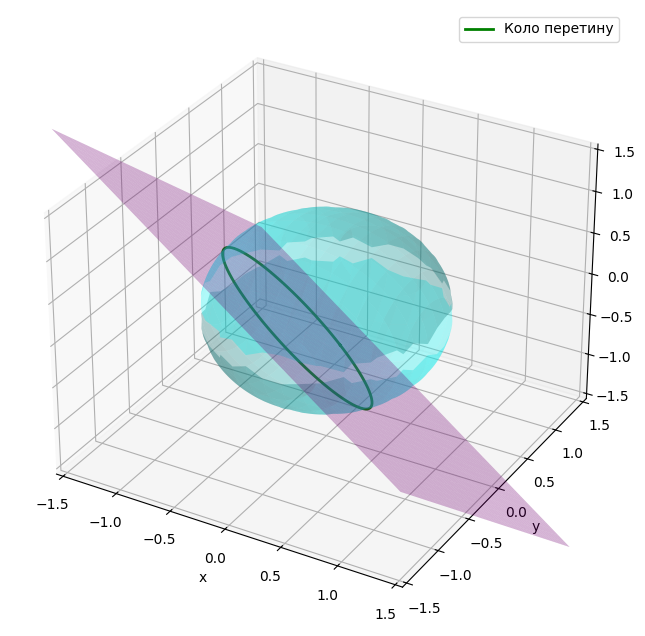

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Визначення рівнянь
def f1(x, y, z):
    return x**2 + y**2 + z**2 - 1  # Сфера

def f2(x, y, z):
    return x + y + z + 0.5  # площина

# Вектор функцій
def F(x, y, z):
    return [f1(x, y, z), f2(x, y, z)]

# Якобі матриця
def jacobi(x, y, z):
    return [
        [2 * x, 2 * y, 2 * z],
        [1, 1, 1]
    ]

# Функція для обчислення норми вектора
def vector_norm(v):
    return sum(v_i**2 for v_i in v) ** 0.5

# Функція для обчислення векторного добутку
def vector_cross(v1, v2):
    return [
        v1[1] * v2[2] - v1[2] * v2[1],
        v1[2] * v2[0] - v1[0] * v2[2],
        v1[0] * v2[1] - v1[1] * v2[0]
    ]

# Функція для транспонування матриці
def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

# Функція для множення двох матриць
def multiply_matrices(a, b):
    if len(a[0]) != len(b):
        raise ValueError("Матриці мають несумісні розміри для множення.")
    return [
        [
            sum(a[i][k] * b[k][j] for k in range(len(b)))
            for j in range(len(b[0]))
        ]
        for i in range(len(a))
    ]

# Функція для обчислення псевдооберненої матриці методом A^T (A A^T)^{-1}
def pseudo_inverse(a):
    A_T = transpose(a)  # Транспонована матриця (3x2)
    A_A_T = multiply_matrices(a, A_T)  # A * A^T (2x2)

    # Обчислення детермінанти матриці A_A_T
    det = A_A_T[0][0] * A_A_T[1][1] - A_A_T[0][1] * A_A_T[1][0]
    if abs(det) < 1e-10:
        raise ValueError("Матриця A * A^T вироджена і не може бути інвертована.")

    # Обчислення оберненої матриці A_A_T^{-1}
    inv_A_A_T = [
        [ A_A_T[1][1] / det, -A_A_T[0][1] / det ],
        [ -A_A_T[1][0] / det, A_A_T[0][0] / det ]
    ]

    # Обчислення псевдооберненої матриці A^+
    A_pseudo_inv = multiply_matrices(A_T, inv_A_A_T)  # (3x2) * (2x2) = (3x2)
    return A_pseudo_inv

# Модифікований метод Ньютона
def modified_newton_method_fixed_jacobian(x0, y0, z0, tol):
    x, y, z = x0, y0, z0

    # Обчислення фіксованої Якобі-матриці на початку
    J = jacobi(x, y, z)
    try:
        J_inv = pseudo_inverse(J)  # Псевдообернена матриця
    except ValueError as e:
        print(f"Помилка при обчисленні псевдооберненої матриці: {e}")
        return None

    iteration = 0
    while True:
        F_val = F(x, y, z)
        accuracy = vector_norm(F_val)
        print(f"Ітерація {iteration}: x = {x}, y = {y}, z = {z}, точність = {accuracy}")

        if accuracy < tol:
            print(f"Знайдено розв'язок: x = {x}, y = {y}, z = {z} за {iteration} ітерацій")
            return x, y, z

        # Обчислення поправки: delta = -J_inv * F_val
        delta = [
            -sum(J_inv[i][k] * F_val[k] for k in range(len(F_val)))
            for i in range(len(J_inv))
        ]

        # Оновлення змінних
        x, y, z = x + delta[0], y + delta[1], z + delta[2]

        # Перевірка на відсутність прогресу
        if vector_norm(delta) < 1e-12:
            print("Прогрес став занадто малим. Можливо, метод не збігається.")
            return None

        iteration += 1


# Знаходження кола перетину
def get_circle_of_intersection():
    normal = [1, 1, 1]
    norm_length = vector_norm(normal)
    normal = [n / norm_length for n in normal]

    center_sphere = [0, 0, 0]
    d = 0.5 / norm_length  # Відстань площини від початку координат

    center_projection = [
        center_sphere[i] - d * normal[i] for i in range(3)
    ]

    radius_squared = 1 - sum(c**2 for c in center_projection)
    if radius_squared < 0:
        raise ValueError("Площина не перетинає сферу.")
    radius = radius_squared ** 0.5

    v1 = vector_cross(normal, [1, 0, 0])
    if vector_norm(v1) == 0:
        v1 = vector_cross(normal, [0, 1, 0])
    v1 = [v / vector_norm(v1) for v in v1]
    v2 = vector_cross(normal, v1)

    theta = np.linspace(0, 2 * np.pi, 100)
    circle_x = [
        center_projection[0] + radius * (v1[0] * np.cos(t) + v2[0] * np.sin(t))
        for t in theta
    ]
    circle_y = [
        center_projection[1] + radius * (v1[1] * np.cos(t) + v2[1] * np.sin(t))
        for t in theta
    ]
    circle_z = [
        center_projection[2] + radius * (v1[2] * np.cos(t) + v2[2] * np.sin(t))
        for t in theta
    ]

    return circle_x, circle_y, circle_z

# Графік поверхонь
def plot_surfaces():
    x = np.linspace(-1.5, 1.5, 200)
    y = np.linspace(-1.5, 1.5, 200)
    x, y = np.meshgrid(x, y)

    z_sphere_positive = np.sqrt(np.maximum(0, 1 - x**2 - y**2))
    z_sphere_negative = -np.sqrt(np.maximum(0, 1 - x**2 - y**2))

    valid_mask = (x**2 + y**2 <= 1)
    z_sphere_positive[~valid_mask] = np.nan
    z_sphere_negative[~valid_mask] = np.nan

    z_plane = -x - y - 0.5

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, z_sphere_positive, color='cyan', alpha=0.3, rstride=10, cstride=10)
    ax.plot_surface(x, y, z_sphere_negative, color='cyan', alpha=0.3, rstride=10, cstride=10)
    ax.plot_surface(x, y, z_plane, color='magenta', alpha=0.3)

    circle_x, circle_y, circle_z = get_circle_of_intersection()
    ax.plot(circle_x, circle_y, circle_z, color='green', linewidth=2, label="Коло перетину")

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    ax.legend()
    plt.show()

try:
    x0 = float(input("Введіть початкове наближення для x: "))
    y0 = float(input("Введіть початкове наближення для y: "))
    z0 = float(input("Введіть початкове наближення для z: "))
    tol = float(input("Введіть точність (наприклад, 1e-6): "))

    result = modified_newton_method_fixed_jacobian(x0, y0, z0, tol)
    if result:
        plot_surfaces()
except ValueError as e:
    print(f"Помилка: {e}")
